# Urban canyon study

This example shows the behavior of sparrowpy in the simulation of an urban canyon under different simulation conditions

In [42]:
"""Test the radiosity.Radiosity module."""
import numpy as np
import pyfar as pf
import sparrowpy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

%matplotlib inline
# %matplotlib ipympl

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


Lets define our room and source position.

In [43]:
def urban_canyon_stub(length_x, length_y, length_z):
    """Create a shoebox room with the given dimensions.

    Parameters
    ----------
    length_x : float
        Length of the urban canyon in meters.
    length_y : float
        width of the urban canyon in meters.
    length_z : float
        height of the urban canyon in meters.

    Returns
    -------
    room : list[geo.Polygon]
        List of the walls of the room.

    """
    return [
        sp.geometry.Polygon(
            [[0, 0, 0], [length_x, 0, 0],
            [length_x, 0, length_z], [0, 0, length_z]],
            [0, 0, 1], [0, 1, 0]),
        sp.geometry.Polygon(
            [[0, 0, 0],[0, length_y, 0],
            [length_x, length_y, 0], [length_x, 0, 0 ]],
            [1, 0, 0], [0, 0, 1]),
        sp.geometry.Polygon(
            [[0, length_y, 0], [length_x, length_y, 0],
            [length_x, length_y, length_z], [0, length_y, length_z]],
            [0, 0, 1], [0, -1, 0]),
        ]

In [ ]:
# Define parameters
X = 50
Y = 50
Z = 50

# create geometry
canyon = urban_canyon_stub(X, Y, Z)
source = pf.Coordinates(20, 5, 1)
receiver = pf.Coordinates(60, 2, 1.7)

In [49]:
from run_simu import run_simu




In [ ]:
%%mprun -f run_simu 
run_simu(walls=urban_canyon_stub(1,1,1),source=pf.Coordinates(.5,.5,.5),receiver=pf.Coordinates(.5,.5,.5))

c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py:24: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


Filename: c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     7    374.1 MiB    374.1 MiB           1   def run_simu(walls, source, receiver,
     8                                                      patch_size=1, absorption=.1, scattering=1,
     9                                                      speed_of_sound=343.26, time_step=.1, duration=.5,
    10                                                      refl_order=3, freq=np.array([1000])):
    11                                             # create object
    12    374.1 MiB      0.0 MiB           1       radi = sp.DirectionalRadiosityFast.from_polygon(walls, patch_size)
    13                                             # create directional scattering data (totally diffuse)
    14    374.1 MiB      0.0 MiB           1       brdf_sources = pf.Coordinates(0, 0, 1, weights=1)
    15    374.1 MiB      0.0 MiB           1       brdf_receivers = pf.Coordinate

### run simulation

In [ ]:
%%mprun -f run_simu
etc = run_simu(walls=canyon, source=source, receiver=receiver, patch_size=5, time_step=.02, duration=1.2, refl_order=50)


c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py:24: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


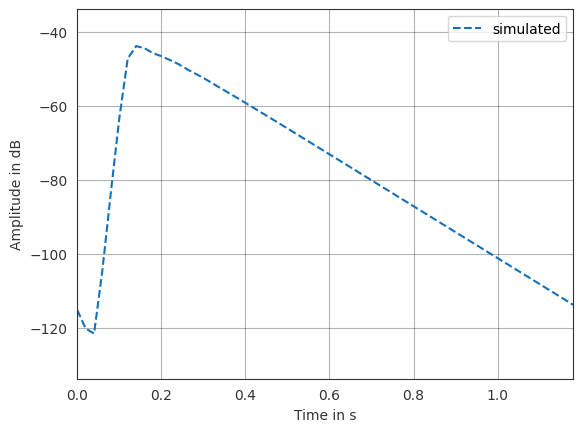

In [20]:
plt.figure()

pf.plot.time(
    etc, dB=True, log_prefix=10,
    label='simulated',
    linestyle='--')

plt.legend()
plt.show()

If the order would be increased, this would match even after 0.5s.


In [16]:
%load_ext watermark
%watermark -v -m -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.11.9
IPython version      : 9.1.0

Compiler    : MSC v.1938 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 25 Model 68 Stepping 1, AuthenticAMD
CPU cores   : 16
Architecture: 64bit

pyfar          : 0.7.2
numpy          : 1.26.4
matplotlib     : 3.10.1
memory_profiler: 0.61.0
sparrowpy      : 0.1.0

